# Sprint 2

## Team ID: PNT2022TMID43387

###  Importing the required libraries

In [2]:
!pip install keras==2.7.0
!pip install tensorflow==2.7.0

     |████████████████████████████████| 489.7 MB 12 kB/s /s eta 0:00:01 158.9 MB 69.5 MB/s eta 0:00:05��███████████████████▋           | 314.8 MB 109.3 MB/s eta 0:00:02��███████▋     | 406.6 MB 114.2 MB/s eta 0:00:01████▉    | 425.7 MB 114.2 MB/s eta 0:00:01██████▏ | 462.3 MB 114.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 97.1 MB/s eta 0:00:01██████████████▍       | 10.7 MB 97.1 MB/s eta 0:00:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2


In [12]:
import numpy as np
import tensorflow

In [13]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #dense and flatten layers
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam #optimizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

### Data preprocessing - Sprint 1

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#CNN expected format: (batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes) #converts output to binary format
y_test=np_utils.to_categorical(y_test,no_of_classes)

### Add CNN Layers

In [15]:
#create model
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

### Compiling the model

In [16]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Compilation requires 3 arguments: an optimizer, a loss function, and a list of metrics.
In our project, we have 2 classes in the output, so the loss is binary_crossentropy.
If you have more than two classes in output put “loss = categorical_cross entropy”. 

In [17]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

### Train the model

In [18]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2910 - accuracy: 0.9168 - val_loss: 0.0510 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1006 - accuracy: 0.9733 - val_loss: 0.0488 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0781 - accuracy: 0.9799 - val_loss: 0.0337 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0669 - accuracy: 0.9818 - val_loss: 0.0274 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0570 - accuracy: 0.9847 - val_loss: 0.0233 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0509 - accuracy: 0.9863 - val_loss: 0.0391 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0462 - accuracy: 0.9881 - val_loss: 0.0296 -

Arguments:
steps_per_epoch : it specifies the total number of steps taken from the generator as soon as one epoch is finished and the next epoch has started. We can calculate the value of steps_per_epoch as the total number of samples in your dataset divided by the batch size.

Epochs: an integer and number of epochs we want to train our model for.

Validation_data :  
an inputs and targets list
a generator
inputs, targets, and sample_weights list which can be used to evaluate the loss and metrics for any model after any epoch has ended.


validation_steps: only if the validation_data is a generator then only this argument can be used. It specifies the total number of steps taken from the generator before it is stopped at every epoch and its value is calculated as the total number of validation data points in your dataset divided by the validation batch size.

### Observing the metrics

In [19]:
#final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy) : ")
print(metrics)

Metrics(Test loss & Test Accuracy) : 
[0.028102567419409752, 0.9921000003814697]


### Test the model

In [20]:
prediction=model.predict(x_test[:5])
print(prediction)

[[2.6135920e-09 7.1917398e-08 1.0251723e-06 2.3302334e-08 1.1862093e-07
  1.1589192e-08 1.4605881e-09 9.9999857e-01 2.8011376e-08 6.4158442e-08]
 [1.2748733e-07 1.2258040e-06 9.9999523e-01 6.4876792e-07 3.7956832e-07
  4.7693625e-08 2.1823462e-07 1.1532727e-06 3.9722880e-07 6.1206174e-07]
 [3.0784594e-08 9.9999595e-01 2.1189776e-07 1.0214749e-06 9.1439358e-07
  3.7026638e-07 2.8054495e-07 1.0288297e-06 1.0579505e-07 9.2091994e-08]
 [9.9999881e-01 9.4235846e-09 1.6276191e-08 1.1718454e-07 4.9316281e-08
  3.7032201e-08 3.2422349e-07 2.5737366e-08 3.3178279e-07 2.1691366e-07]
 [3.3426499e-08 3.3541571e-07 2.7378573e-07 2.8881763e-07 9.9999034e-01
  1.6878955e-07 9.3303692e-07 2.5624161e-07 7.1026665e-07 6.7211340e-06]]


In [21]:
print(np.argmax(prediction,axis=1)) #printing labels from first 4 images
print(y_test[:5]) #printing the actual labels

[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


As we already predicted the input from the x_test. According to that by using argmax function here we are printing the labels with high prediction values 

### Saving the model

In [64]:
pwd

'/home/wsuser/work'

In [78]:
#save the model
model.save('/home/wsuser/work/mnistCNN2.h5')

The model is saved with .h5 extension as follows:
An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data.

### Convert h5 file to tar file

In [80]:
!tar -zcvf digitrec_model_new.tgz /home/wsuser/work/mnistCNN2.h5

tar: Removing leading `/' from member names
/home/wsuser/work/mnistCNN2.h5


In [81]:
ls -1

digitrec_model_new.tgz
mnistCNN2.h5
models/
my_model1.tar.gz
my_model2.tar.gz


In [66]:
!pip install watson-machine-learning-client --upgrade

#### Watson machine learning client

In [82]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "pA-JuuYkExW-jB7yTto_CWP6uj_PtdIY48PxJ1wiJbi9" 
}
client=APIClient(wml_credentials)

In [83]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [84]:
space_uid=guid_from_space_name(client, 'digit-recognition')
print("Space UID = " + space_uid)

Space UID = f6591457-ebb1-41bf-9811-d26cc5259ef6


In [85]:
client.set.default_space(space_uid)

'SUCCESS'

In [86]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [87]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [88]:
model_details=client.repository.store_model(model='digitrec_model_new.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"handwritten-digit",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                           )
model_id=client.repository.get_model_id(model_details)

In [89]:
model_id

'7d713136-f90d-4846-a1ea-661766792b2b'

In [75]:
loss_and_acc=model.evaluate(x_test,y_test,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 3s - loss: 0.0281 - accuracy: 0.9921 - 3s/epoch - 11ms/step
Test Loss 0.028102567419409752
Test Accuracy 0.9921000003814697


Predicted Value:  7


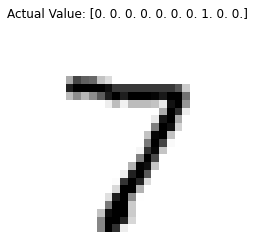

In [48]:
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))

In [91]:
client.repository.download(model_id, "my_model3.tar.gz")

Successfully saved model content to file: 'my_model3.tar.gz'


'/home/wsuser/work/my_model3.tar.gz'

#### Sample image test 

In [35]:
from keras.models import load_model
from PIL import Image
import numpy as np

In [36]:
model=load_model('models/mnistCNN2.h5')

In [37]:
from keras.preprocessing import image

In [38]:
pwd

'/home/wsuser/work'

In [39]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p-oAby0xEbW4s6Q5bRn-VGf7V9K_hxsMlexHQlfzQ6yk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'anovelmethodforhandwrittendigitre-donotdelete-pr-d44mpnqdqkydpq'
object_key = 'five.png'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
img=Image.open(streaming_body_5).convert("L")

In [40]:
img=img.resize((28,28))
im2arr=np.array(img)
im2arr=im2arr.reshape(1,28,28,1)
y_pred=model.predict(im2arr)
print(np.argmax(y_pred))

5


In [41]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p-oAby0xEbW4s6Q5bRn-VGf7V9K_hxsMlexHQlfzQ6yk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'anovelmethodforhandwrittendigitre-donotdelete-pr-d44mpnqdqkydpq'
object_key = '3.png'

streaming_body_6 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
img=Image.open(streaming_body_6).convert("L")

In [42]:
img=img.resize((28,28))
im2arr=np.array(img)
im2arr=im2arr.reshape(1,28,28,1)
y_pred=model.predict(im2arr)
print(np.argmax(y_pred))

3
